In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from scipy import stats
from sklearn.metrics import precision_score, recall_score, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv(r'credit_customers.csv')

data

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,4.0,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,4.0,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,4.0,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,4.0,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


In [3]:
data.describe(include='all')

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
count,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000
unique,4,NaN,5,10,NaN,5,5,NaN,4,3,NaN,4,NaN,3,3,NaN,4,NaN,2,2,2
top,no checking,NaN,existing paid,radio/tv,NaN,<100,1<=X<4,NaN,male single,none,NaN,car,NaN,none,own,NaN,skilled,NaN,none,yes,good
freq,394,NaN,530,280,NaN,603,339,NaN,548,907,NaN,332,NaN,814,713,NaN,630,NaN,596,963,700
mean,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,NaN,NaN,2.845000,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN,NaN
std,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,NaN,NaN,1.103718,NaN,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN,NaN
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,NaN,NaN,2.000000,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
50%,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,NaN,NaN,3.000000,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
75%,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,NaN,4.000000,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN,NaN


In [4]:
data.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [5]:
data['class'] = np.where(data['class']=='good',0,1)

In [6]:
data_lr = data.copy()
data_rf = data.copy()

## Data Preprocess for LR

In [7]:
for i in data_lr.columns[:-1]:
    if data_lr[i].dtypes != object:
        
        q1 = data_lr[i].quantile(0.25)
        q2 = data_lr[i].quantile(0.5)
        q3 = data_lr[i].quantile(0.75)

        ranges = [-np.inf, q1, q2, q3, np.inf]
        data_lr['category_' + i] = pd.cut(data_lr[i], bins=ranges, duplicates='drop')

        grouped = data_lr.groupby(['category_' + i, 'class'])['class'].count().unstack().reset_index()

        grouped['positive_prop'] = grouped[0] / grouped[0].sum()
        grouped['negative_prop'] = grouped[1] / grouped[1].sum()

        grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
        
        grouped.rename(columns={'woe': i + '_woe'}, inplace=True)
        data_lr = data_lr.merge(grouped[['category_' + i, i + '_woe']], how='left', on='category_' + i)
    else:
        grouped = data_lr.groupby([i, 'class'])['class'].count().unstack().reset_index()

        grouped['positive_prop'] = grouped[0] / grouped[0].sum()
        grouped['negative_prop'] = grouped[1] / grouped[1].sum()

        grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])

        grouped.rename(columns={'woe':i+'_woe'}, inplace=True)
        data_lr = data_lr.merge(grouped[[i,i+'_woe']], how='left', on=i)

data_lr

C:\Users\Nurane2\AppData\Local\Temp\ipykernel_21844\2927874221.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data_lr.groupby(['category_' + i, 'class'])['class'].count().unstack().reset_index()
C:\Users\Nurane2\AppData\Local\Temp\ipykernel_21844\2927874221.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data_lr.groupby(['category_' + i, 'class'])['class'].count().unstack().reset_index()
C:\Users\Nurane2\AppData\Local\Temp\ipykernel_21844\2927874221.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass o

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,checking_status_woe,category_duration,duration_woe,credit_history_woe,purpose_woe,category_credit_amount,credit_amount_woe,savings_status_woe,employment_woe,category_installment_commitment,installment_commitment_woe,personal_status_woe,other_parties_woe,category_residence_since,residence_since_woe,property_magnitude_woe,category_age,age_woe,other_payment_plans_woe,housing_woe,category_existing_credits,existing_credits_woe,job_woe,category_num_dependents,num_dependents_woe,own_telephone_woe,foreign_worker_woe
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,0,-0.818099,"(-inf, 12.0]",0.467416,0.733741,0.410063,"(-inf, 1365.5]",-0.037812,0.704246,0.235566,"(3.0, 4.0]",-0.157300,0.165548,0.000525,"(3.0, 4.0]",-0.001153,0.461035,"(42.0, inf]",0.223144,0.121179,0.194156,"(1.0, 2.0]",0.115710,0.022780,"(-inf, 1.0]",-0.002816,0.098638,-0.034867
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,1,-0.401392,"(24.0, inf]",-0.620240,-0.088319,0.410063,"(3972.25, inf]",-0.524524,-0.271358,-0.032103,"(-inf, 2.0]",0.190473,-0.235341,0.000525,"(-inf, 2.0]",-0.017335,0.461035,"(-inf, 27.0]",-0.305191,0.121179,0.194156,"(-inf, 1.0]",-0.074877,0.022780,"(-inf, 1.0]",-0.002816,-0.064691,-0.034867
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,0,1.176263,"(-inf, 12.0]",0.467416,0.733741,-0.606136,"(1365.5, 2319.5]",0.262010,-0.271358,0.394415,"(-inf, 2.0]",0.190473,0.165548,0.000525,"(2.0, 3.0]",0.054941,0.461035,"(42.0, inf]",0.223144,0.121179,0.194156,"(-inf, 1.0]",-0.074877,0.097164,"(1.0, inf]",0.015409,-0.064691,-0.034867
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,0,-0.818099,"(24.0, inf]",-0.620240,-0.088319,-0.095557,"(3972.25, inf]",-0.524524,-0.271358,0.394415,"(-inf, 2.0]",0.190473,0.165548,0.587787,"(3.0, 4.0]",-0.001153,-0.028573,"(42.0, inf]",0.223144,0.121179,-0.472604,"(-inf, 1.0]",-0.074877,0.022780,"(1.0, inf]",0.015409,-0.064691,-0.034867
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,1,-0.818099,"(18.0, 24.0]",0.025642,-0.085158,-0.359200,"(3972.25, inf]",-0.524524,-0.271358,-0.032103,"(2.0, 3.0]",0.064539,0.165548,0.000525,"(3.0, 4.0]",-0.001153,-0.586082,"(42.0, inf]",0.223144,0.121179,-0.472604,"(1.0, 2.0]",0.115710,0.022780,"(1.0, inf]",0.015409,-0.064691,-0.034867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,4.0,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,0,1.176263,"(-inf, 12.0]",0.467416,-0.088319,-0.095557,"(1365.5, 2319.5]",0.262010,-0.271358,0.394415,"(2.0, 3.0]",0.064539,-0.235341,0.000525,"(3.0, 4.0]",-0.001153,0.461035,"(27.0, 33.0]",-0.134083,0.121179,0.194156,"(-inf, 1.0]",-0.074877,0.097164,"(-inf, 1.0]",-0.002816,-0.064691,-0.034867
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,4.0,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,0,-0.818099,"(24.0, inf]",-0.620240,-0.088319,0.773836,"(2319.5, 3972.25]",0.395209,-0.271358,-0.032103,"(3.0, 4.0]",-0.157300,-0.441833,0.000525,"(3.0, 4.0]",-0.001153,-0.028573,"(33.0

In [8]:
for i in data_lr.columns:
    if data_lr[i].dtype in ['int64', 'float64']: 
        kstest_statistic, kstest_p_value = stats.kstest(data_lr[i], 'norm')
        print(f'Column: {i}')
        print(f'Kolmogorov-Smirnov Test:')
        print(f'Test Statistic: {kstest_statistic}')
        print(f'p-value: {kstest_p_value}')
        
        if kstest_p_value > 0.05:
            print('Data looks normally distributed')
            print()
        else:
            print('Data does not look normally distributed')
            print()

Column: duration
Kolmogorov-Smirnov Test:
Test Statistic: 0.9999683287581669
p-value: 0.0
Data does not look normally distributed

Column: credit_amount
Kolmogorov-Smirnov Test:
Test Statistic: 1.0
p-value: 0.0
Data does not look normally distributed

Column: installment_commitment
Kolmogorov-Smirnov Test:
Test Statistic: 0.8413447460685429
p-value: 0.0
Data does not look normally distributed

Column: residence_since
Kolmogorov-Smirnov Test:
Test Statistic: 0.8472498680518208
p-value: 0.0
Data does not look normally distributed

Column: age
Kolmogorov-Smirnov Test:
Test Statistic: 1.0
p-value: 0.0
Data does not look normally distributed

Column: existing_credits
Kolmogorov-Smirnov Test:
Test Statistic: 0.8413447460685429
p-value: 0.0
Data does not look normally distributed

Column: num_dependents
Kolmogorov-Smirnov Test:
Test Statistic: 0.8413447460685429
p-value: 0.0
Data does not look normally distributed

Column: class
Kolmogorov-Smirnov Test:
Test Statistic: 0.5
p-value: 1.06451729

In [9]:
def target_correlation(data, target, threshold=0.1):
    
    woe_features = data.filter(regex='_woe$', axis=1)
    woe_features[target] = data[target] 
    
    corr_matrix = woe_features.corr(method='spearman')
    
    target_correlations = corr_matrix[target].abs() > threshold
    
    variables_explaining_target = target_correlations[target_correlations].index.tolist()

    variables_explaining_target.remove(target)
    
    result_explaining_target = pd.DataFrame(
    {'Variable': variables_explaining_target,
    'Correlation with Target': corr_matrix.loc[variables_explaining_target, target]})
    
    result_explaining_target.reset_index(drop=True, inplace=True)
    
    return result_explaining_target


target_result = target_correlation(data_lr, 'class')

target_result

C:\Users\Nurane2\AppData\Local\Temp\ipykernel_21844\826307772.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  woe_features[target] = data[target]


,Variable,Correlation with Target
0,checking_status_woe,-0.347944
1,duration_woe,-0.179965
2,credit_history_woe,-0.221606
3,purpose_woe,-0.179875
4,credit_amount_woe,-0.158096
5,savings_status_woe,-0.178989
6,employment_woe,-0.132734
7,property_magnitude_woe,-0.140851
8,age_woe,-0.116511
9,other_payment_plans_woe,-0.113046


In [10]:
def intercorrelation(data, target, threshold=0.7):
    
    woe_features = data.filter(regex='_woe$', axis=1) 
    
    corr_matrix = woe_features.corr(method='spearman')
    
    highly_correlated_variables = (np.abs(corr_matrix) > threshold) & (corr_matrix != 1.0)
    
    independent_variable_pairs = np.where(highly_correlated_variables)
    
    correlated_pairs_set = set()
   
    for var1, var2 in zip(independent_variable_pairs[0], independent_variable_pairs[1]):

        if var1 < var2:
            correlated_pairs_set.add((corr_matrix.index[var1], corr_matrix.columns[var2]))
        else:
            correlated_pairs_set.add((corr_matrix.index[var2], corr_matrix.columns[var1]))
    
    result_intercorrelated_independent = pd.DataFrame(list(correlated_pairs_set), columns=['Variable 1', 'Variable 2'])
    
    return result_intercorrelated_independent

# Example usage
intercorrelated_result = intercorrelation(data_lr, 'class')
intercorrelated_result

,Variable 1,Variable 2


In [11]:
data_rf

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,0
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,1
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,0
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,0
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,4.0,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,0
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,4.0,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,0
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,4.0,car,38.0,none,own,1.0,skilled,1.0,none,yes,0
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,4.0,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,1


## Data preprocess for RF

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

label_cols = ['purpose', 'personal_status', 'other_parties', 'property_magnitude', 'housing','other_payment_plans']

for i in label_cols:
    data_rf[i] = le.fit_transform(data_rf[i])

data_rf

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,6,1169.0,no known savings,>=7,4.0,3,2,4.0,3,67.0,1,1,2.0,skilled,1.0,yes,yes,0
1,0<=X<200,48.0,existing paid,6,5951.0,<100,1<=X<4,2.0,0,2,2.0,3,22.0,1,1,1.0,skilled,1.0,none,yes,1
2,no checking,12.0,critical/other existing credit,2,2096.0,<100,4<=X<7,2.0,3,2,3.0,3,49.0,1,1,1.0,unskilled resident,2.0,none,yes,0
3,<0,42.0,existing paid,3,7882.0,<100,4<=X<7,2.0,3,1,4.0,1,45.0,1,0,1.0,skilled,2.0,none,yes,0
4,<0,24.0,delayed previously,4,4870.0,<100,1<=X<4,3.0,3,2,4.0,2,53.0,1,0,2.0,skilled,2.0,none,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,3,1736.0,<100,4<=X<7,3.0,0,2,4.0,3,31.0,1,1,1.0,unskilled resident,1.0,none,yes,0
996,<0,30.0,existing paid,9,3857.0,<100,1<=X<4,4.0,1,2,4.0,1,40.0,1,1,1.0,high qualif/self emp/mgmt,1.0,yes,yes,0
997,no checking,12.0,existing paid,6,804.0,<100,>=7,4.0,3,2,4.0,0,38.0,1,1,1.0,skilled,1.0,none,yes,0
998,<0,45.0,existing paid,6,1845.0,<100,1<=X<4,4.0,3,2,4.0,2,23.0,1,0,1.0,skilled,1.0,yes,yes,1


In [13]:
data_rf['own_telephone'] = data_rf['own_telephone'].map({'yes':1,'none':0})
data_rf['foreign_worker'] = data_rf['foreign_worker'].map({'yes':1,'no':0})
data_rf['job'] = data_rf['job'].map({
    'unemp/unskilled non res' : 0,
    'unskilled resident ': 1,
    'skilled': 2,
    'high qualif/self emp/mgmt': 3
})
data_rf['savings_status'] = data_rf['savings_status'].map({
    'no known savings' : 0,
    '<100': 1,
    '100<=X<500': 2,
    '500<=X<1000': 3,
    '>=1000': 4
})
data_rf['checking_status'] = data_rf['checking_status'].map({
    'no checking': 1,
    '<0': 2,
    '0<=X<200': 3,
    '>=200': 4
})
data_rf['employment'] = data_rf['employment'].map({
    '<1': 1,
    '1<=X<4': 2,
    '4<=X<7': 3,
    '>=7': 4
})
data_rf['credit_history'] = data_rf['credit_history'].map({
    'all paid': 1,
    'existing paid': 2,
    'delayed previously': 3,
    'critical/other existing credit': 4
})
data_rf

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,2,6.0,4.0,6,1169.0,0,4.0,4.0,3,2,4.0,3,67.0,1,1,2.0,2.0,1.0,1,1,0
1,3,48.0,2.0,6,5951.0,1,2.0,2.0,0,2,2.0,3,22.0,1,1,1.0,2.0,1.0,0,1,1
2,1,12.0,4.0,2,2096.0,1,3.0,2.0,3,2,3.0,3,49.0,1,1,1.0,NaN,2.0,0,1,0
3,2,42.0,2.0,3,7882.0,1,3.0,2.0,3,1,4.0,1,45.0,1,0,1.0,2.0,2.0,0,1,0
4,2,24.0,3.0,4,4870.0,1,2.0,3.0,3,2,4.0,2,53.0,1,0,2.0,2.0,2.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,12.0,2.0,3,1736.0,1,3.0,3.0,0,2,4.0,3,31.0,1,1,1.0,NaN,1.0,0,1,0
996,2,30.0,2.0,9,3857.0,1,2.0,4.0,1,2,4.0,1,40.0,1,1,1.0,3.0,1.0,1,1,0
997,1,12.0,2.0,6,804.0,1,4.0,4.0,3,2,4.0,0,38.0,1,1,1.0,2.0,1.0,0,1,0
998,2,45.0,2.0,6,1845.0,1,2.0,4.0,3,2,4.0,2,23.0,1,0,1.0,2.0,1.0,1,1,1


## Declare inputs vs output for both models

In [14]:
inputs_lr = data_lr[target_result.Variable.tolist()]
inputs_rf = data_rf.drop('class', axis=1)

target = data['class']

In [15]:
X_train_lr, X_test_lr, y_train, y_test = train_test_split(inputs_lr, target, test_size=0.2, random_state=42)
X_train_rf, X_test_rf, y_train, y_test = train_test_split(inputs_rf, target, test_size=0.2, random_state=42)

In [16]:
def evaluate(model, X_train, y_train, X_test, y_test):
    
    '''Predictions and probabilities for the training set'''
    
    y_train_pred = model.predict(X_train)
    y_train_prob = model.predict_proba(X_train)[:, 1]

    '''Predictions and probabilities for the test set'''
    
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1]

    '''Calculate metrics for the training set''' 
    
    roc_train_prob = roc_auc_score(y_train, y_train_prob)
    gini_train_prob = roc_train_prob * 2 - 1
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)

    '''Calculate metrics for the test set'''
    
    roc_test_prob = roc_auc_score(y_test, y_test_prob)
    gini_test_prob = roc_test_prob * 2 - 1
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)

    results = pd.DataFrame({
        'Dataset': ['Train', 'Test'],
        'Gini': [gini_train_prob * 100, gini_test_prob * 100],
        'Precision': [precision_train, precision_test],
        'Recall': [recall_train, recall_test]
    })

    confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    
    return results , confusion_matrix

## Default models

In [20]:
lr = LogisticRegression()
rf = RandomForestClassifier(random_state=42)

lr.fit(X_train_lr,y_train)
rf.fit(X_train_rf,y_train)

RandomForestClassifier(random_state=42)

In [21]:
evaluate(lr, X_train_lr, y_train, X_test_lr, y_test)

(  Dataset       Gini  Precision    Recall
 0   Train  61.996452   0.633136  0.443983
 1    Test  62.687823   0.625000  0.423729,
 array([[126,  15],
        [ 34,  25]]))

In [85]:
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve, auc


variables = []
train_gini_scores = []
test_gini_scores = []


for i in X_train_lr.columns:
    X_train_single_var = X_train_lr[[i]]
    X_test_single_var = X_test_lr[[i]]

    lr.fit(X_train_single_var, y_train)
    y_pred_train_single_var = lr.predict_proba(X_train_single_var)[:, 1]

    train_roc = roc_auc_score(y_train, y_pred_train_single_var)

    train_gini = 2 * train_roc - 1

    y_pred_test_single_var = lr.predict_proba(X_test_single_var)[:, 1]

    test_roc = roc_auc_score(y_test, y_pred_test_single_var)

    test_gini = 2 * test_roc - 1

    variables.append(i)
    train_gini_scores.append(train_gini)
    test_gini_scores.append(test_gini)

results_df = pd.DataFrame({
    'Variable': variables,
    'Train Gini': train_gini_scores,
    'Test Gini': test_gini_scores
})

results_df_sorted = results_df.sort_values(by='Test Gini', ascending=False)

pd.options.display.float_format = '{:.4f}'.format


results_df_sorted


,Variable,Train Gini,Test Gini
0,checking_status_woe,0.3940,0.5033
5,savings_status_woe,0.1684,0.3277
1,duration_woe,0.2030,0.2789
6,employment_woe,0.1389,0.2523
2,credit_history_woe,0.2720,0.1783
4,credit_amount_woe,0.1975,0.1737
3,purpose_woe,0.2375,0.1576
9,other_payment_plans_woe,0.0942,0.1051
7,property_magnitude_woe,0.1911,0.0891
8,age_woe,0.1695,0.0305


In [86]:
inputs_lr = data_lr[['checking_status_woe','savings_status_woe','duration_woe','employment_woe','credit_history_woe',
                    'credit_amount_woe', 'purpose_woe','other_payment_plans_woe']]

In [87]:
X_train_lr, X_test_lr, y_train, y_test = train_test_split(inputs_lr, target, test_size=0.2, random_state=42)

In [88]:
lr = LogisticRegression()
lr.fit(X_train_lr,y_train)


LogisticRegression()

In [90]:
evaluate(lr, X_train_lr, y_train, X_test_lr, y_test)

(  Dataset    Gini  Precision  Recall
 0   Train 59.3153     0.6228  0.4315
 1    Test 69.5396     0.6765  0.3898,
 array([[130,  11],
        [ 36,  23]]))

In [91]:
evaluate(rf, X_train_rf, y_train, X_test_rf, y_test)

(  Dataset     Gini  Precision  Recall
 0   Train 100.0000     1.0000  1.0000
 1    Test  63.8418     0.7000  0.3559,
 array([[132,   9],
        [ 38,  21]]))

## Feature Importance for RF

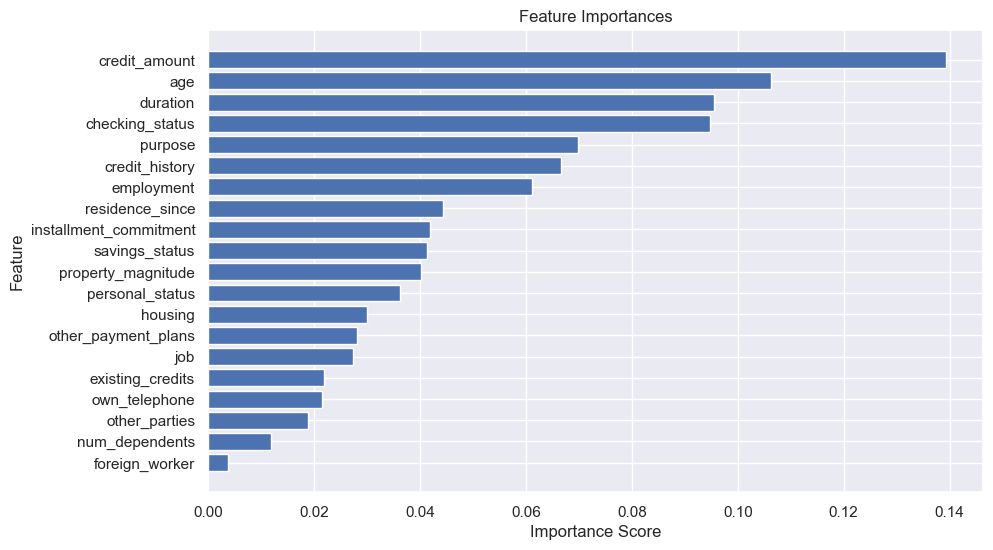

,Feature,Importance
4,credit_amount,0.1394
12,age,0.1062
1,duration,0.0955
0,checking_status,0.0948
3,purpose,0.0698
2,credit_history,0.0665
6,employment,0.0611
10,residence_since,0.0443
7,installment_commitment,0.0419
5,savings_status,0.0413


In [92]:
def plot_feature_importances(model, feature_names):
    
    importances = model.feature_importances_
    
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by="Importance", ascending=False)
   
    
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.title("Feature Importances")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.gca().invert_yaxis() 
    plt.show()
    
    return importance_df

feature_names = X_train_rf.columns

feature_importance_df = plot_feature_importances(rf, feature_names)

feature_importance_df

In [93]:
imp = feature_importance_df[feature_importance_df['Importance']>=0.03]

imp

,Feature,Importance
4,credit_amount,0.1394
12,age,0.1062
1,duration,0.0955
0,checking_status,0.0948
3,purpose,0.0698
2,credit_history,0.0665
6,employment,0.0611
10,residence_since,0.0443
7,installment_commitment,0.0419
5,savings_status,0.0413


In [94]:
imp.Feature.tolist()

['credit_amount',
 'age',
 'duration',
 'checking_status',
 'purpose',
 'credit_history',
 'employment',
 'residence_since',
 'installment_commitment',
 'savings_status',
 'property_magnitude',
 'personal_status',
 'housing']

In [95]:
rf_sel = RandomForestClassifier(random_state=42)

rf_sel.fit(X_train_rf[['credit_amount',
 'age',
 'duration',
 'checking_status',
 'purpose',
 'credit_history',
 'employment',
 'residence_since',
 'installment_commitment',
 'savings_status',
 'property_magnitude',
 'personal_status',
 'housing']],y_train)


RandomForestClassifier(random_state=42)

In [96]:
evaluate(rf_sel, X_train_rf[['credit_amount',
 'age',
 'duration',
 'checking_status',
 'purpose',
 'credit_history',
 'employment',
 'residence_since',
 'installment_commitment',
 'savings_status',
 'property_magnitude',
 'personal_status',
 'housing']], y_train, X_test_rf[['credit_amount',
 'age',
 'duration',
 'checking_status',
 'purpose',
 'credit_history',
 'employment',
 'residence_since',
 'installment_commitment',
 'savings_status',
 'property_magnitude',
 'personal_status',
 'housing']], y_test)

(  Dataset     Gini  Precision  Recall
 0   Train 100.0000     1.0000  1.0000
 1    Test  59.5745     0.6471  0.3729,
 array([[129,  12],
        [ 37,  22]]))

## Hyperparameter optimization for RF

In [97]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
max_depth = [int(x) for x in np.linspace(10, 100, num = 11)]

random_grid = {'n_estimators': n_estimators, 
               'max_features': ['auto', 'sqrt'], 
               'max_depth': max_depth, 
               'min_samples_split': [20,50], 
               'min_samples_leaf': [5, 8, 10]} 

rf_random = RandomizedSearchCV(
                    estimator=rf, 
                    param_distributions=random_grid, 
                    n_iter=50,  
                    cv=3, 
                    verbose=1, 
                    random_state=42, 
                    n_jobs=-1)

rf_random.fit(X_train_rf, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\Nurane2\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
69 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
49 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Nurane2\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Nurane2\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\Nurane2\AppData\Local\anaconda3\Lib\s

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [10, 19, 28, 37, 46, 55,
                                                      64, 73, 82, 91, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [5, 8, 10],
                                        'min_samples_split': [20, 50],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=42, verbose=1)

In [98]:
rf_random.best_params_

{'n_estimators': 911,
 'min_samples_split': 20,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 46}

In [99]:
optimized_model = rf_random.best_estimator_
evaluate(optimized_model, X_train_rf, y_train, X_test_rf, y_test)


(  Dataset    Gini  Precision  Recall
 0   Train 88.1457     0.9424  0.5436
 1    Test 62.3993     0.7391  0.2881,
 array([[135,   6],
        [ 42,  17]]))